In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
adv=pd.read_csv("Advertising.csv")

In [74]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
adv.shape

(200, 4)

In [76]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [77]:
adv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## check for null values

In [78]:
adv.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## correlation

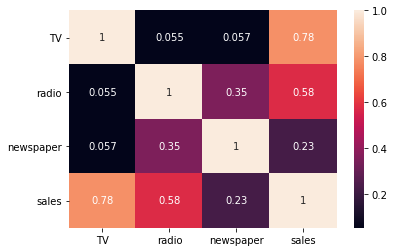

In [79]:
sns.heatmap(adv.corr(),annot=True)

# check distribution with scatter plot

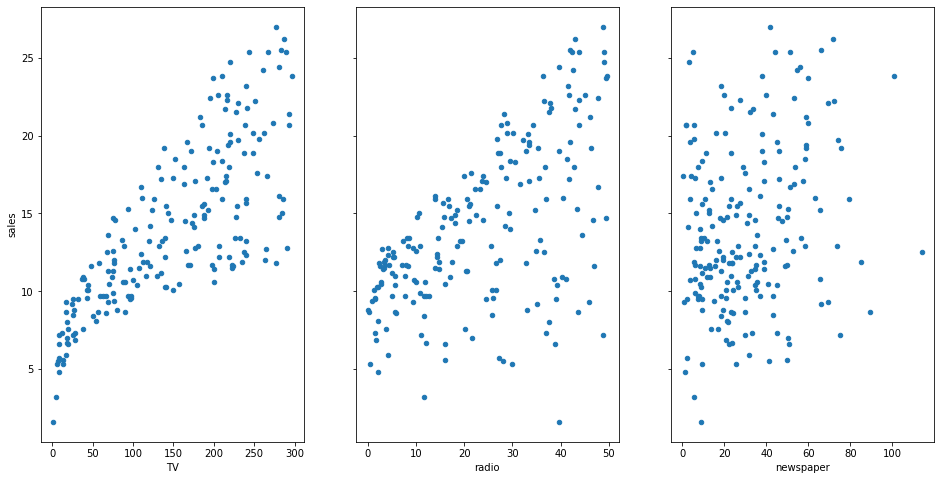

In [80]:
fig,axs=plt.subplots(1,3,sharey=True,figsize=(16,8))
adv.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
adv.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
adv.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [81]:
tv_arr=np.asarray(adv['TV'])
X=tv_arr.reshape(-1,1)
y=adv['sales']

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [84]:
print(lm.coef_)

[0.04753664]


In [85]:
print(lm.intercept_)

7.032593549127693


In [86]:
# predicting sale due to TV advertising using our dataframe
X_new=pd.DataFrame({'TV':[51.5,43,67,88,98.5]})

In [87]:
lm.predict(X_new)

array([ 9.48073053,  9.07666909, 10.21754846, 11.21581791, 11.71495263])

# Multiple Linear Regression

In [88]:
X=adv[['TV','radio','newspaper']]
y=adv['sales']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [90]:
lm=LinearRegression()

In [91]:
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
print(lm.intercept_)
print(lm.coef_)


3.410641588611826
[ 0.04303172  0.19352212 -0.00386729]


In [93]:
# prediction on test data set
y_pred=lm.predict(X_test)

# Model evaluation

In [94]:
from sklearn.metrics import r2_score,mean_squared_error

In [95]:
print("RMSE of the mode is:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE of the mode is: 2.318200075078787


In [96]:
print("R2 score of the model is:",r2_score(y_test,y_pred))

R2 score of the model is: 0.8567790678044409


In [97]:
from sklearn.linear_model import Ridge

In [101]:
rid = Ridge(alpha=0.001, normalize=True)
rid.fit(X_train,y_train)
print(np.sqrt(mean_squared_error(y_train, rid.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, rid.predict(X_test))))


1.3322250081268763
2.3191073991282827


In [102]:
print(np.sqrt(mean_squared_error(y_train,rid.predict(X_train))))


1.3322250081268763


In [104]:
print(np.sqrt(mean_squared_error(y_test,rid.predict(X_test))))

2.3191073991282827


In [105]:
rid.score(X_test,y_test)

0.856666934923584

In [106]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=0.001,normalize=True)
las.fit(X_train,y_train)

Lasso(alpha=0.001, normalize=True)

In [107]:
print(np.sqrt(mean_squared_error(y_train,las.predict(X_train))))

1.3324247568086538


In [108]:
print(np.sqrt(mean_squared_error(y_test,las.predict(X_test))))

2.3201601673816152


In [109]:
las.score(X_test,y_test)

0.8565367721284822

In [110]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.001,normalize=True)
en.fit(X_train,y_train)

ElasticNet(alpha=0.001, normalize=True)

In [111]:
print(np.sqrt(mean_squared_error(y_train,en.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test,en.predict(X_test))))

1.3661004588330798
2.402851402769965


In [112]:
en.score(X_test,y_test)

0.8461283917636694